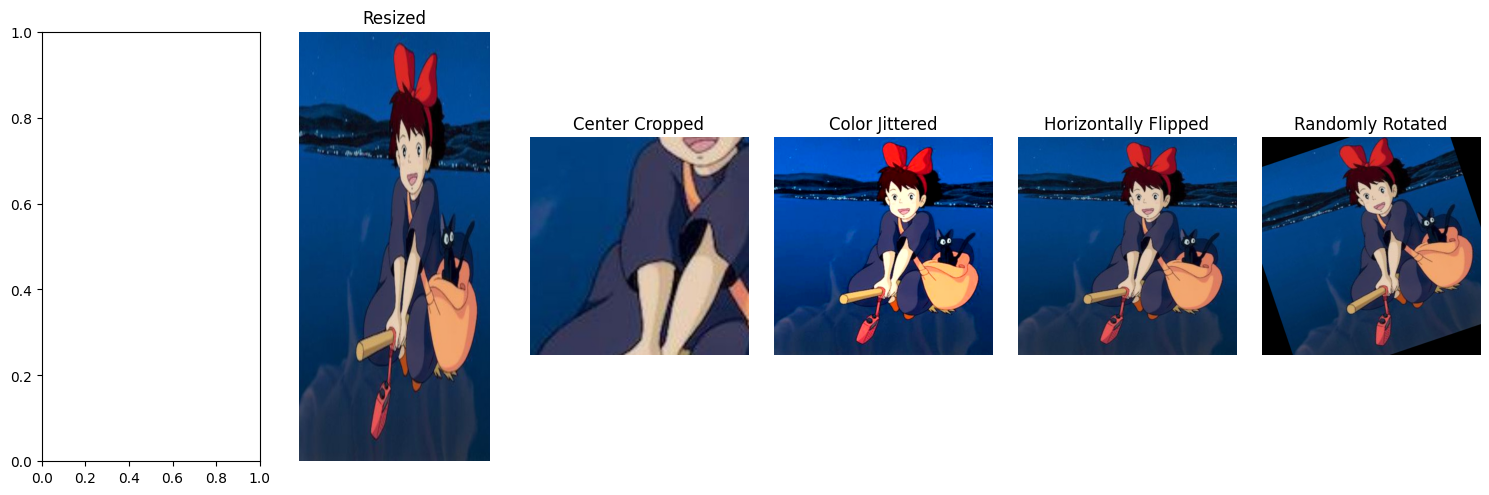

In [21]:
import torch
import torchvision. transforms as transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

#函數從網址加載圖片
def load_image(url):
  response = requests.get(url)
  return Image.open(BytesIO(response.content))

#定義變換
transforms_dict={
    "Original Image":None,
    "Resized":transforms.Resize((1800,800)),
    "Center Cropped":transforms.CenterCrop(400),
    "Color Jittered":transforms.ColorJitter(brightness=0.5, contrast=0.4, saturation=0.3),
    "Horizontally Flipped":transforms.RandomHorizontalFlip(p=0.7),
    "Randomly Rotated":transforms.RandomRotation(50)
}
#加載圖片
img_url = 'https://thumbor.4gamers.com.tw/EyVeQftLyKkC95UP8EgG9nfJDWY=/adaptive-fit-in/1200x1200/filters:no_upscale():extract_cover():format(jpeg):quality(85)/https%3A%2F%2Fugc-media.4gamers.com.tw%2Fpuku-prod-zh%2Fanonymous-story%2F46d2bbfc-7089-4fb6-a413-58ab9a03c3e6.jpg'
img = load_image(img_url)

#準備繪圖
fig, ax = plt.subplots(1, 6, figsize =(15, 5)) # 1 row • 6 column

#繪製和顯示變換後的圖像
for i, (title, transform) in enumerate(transforms_dict.items()):
  transformed_img = img
  if transform:
    transformed_img = transform(transformed_img)
    ax[i].imshow(transformed_img)
    ax[i].set_title(title)
    ax[i].axis('off')

plt.tight_layout()
plt.show()
